In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv('https://gist.githubusercontent.com/tijptjik/9408623/raw/b237fa5848349a14a14e5d4107dc7897c21951f5/wine.csv')
data.head(4)

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480


In [4]:
x=data.drop("Wine",axis=1)
y=data["Wine"]
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,test=train_test_split(x,y,test_size=0.2,random_state=40)
from sklearn.feature_selection import mutual_info_classif
mut_info=mutual_info_classif(xtrain,ytrain)
mut_info

array([0.47764111, 0.29635317, 0.03987326, 0.26789559, 0.26414044,
       0.39634052, 0.64287136, 0.08294149, 0.27766923, 0.57250679,
       0.44678687, 0.50660885, 0.61238535])

In [5]:
mut_info=pd.Series(mut_info)

In [8]:
mut_info.index=xtrain.columns
mut_info.index

Index(['Alcohol', 'Malic.acid', 'Ash', 'Acl', 'Mg', 'Phenols', 'Flavanoids',
       'Nonflavanoid.phenols', 'Proanth', 'Color.int', 'Hue', 'OD', 'Proline'],
      dtype='object')

In [10]:
mut_info.sort_values(ascending=False)

Flavanoids              0.642871
Proline                 0.612385
Color.int               0.572507
OD                      0.506609
Alcohol                 0.477641
Hue                     0.446787
Phenols                 0.396341
Malic.acid              0.296353
Proanth                 0.277669
Acl                     0.267896
Mg                      0.264140
Nonflavanoid.phenols    0.082941
Ash                     0.039873
dtype: float64

<Axes: >

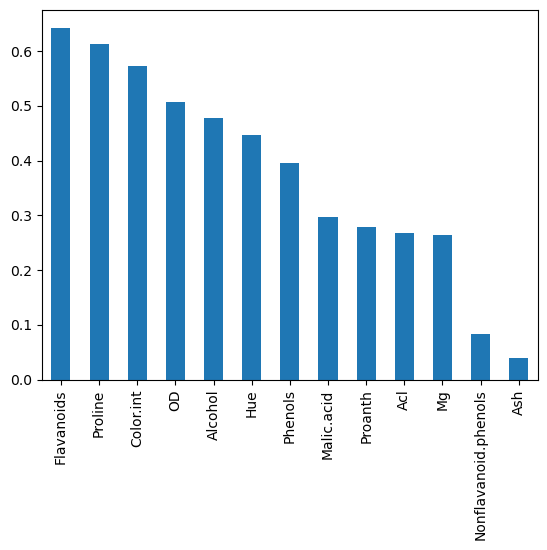

In [11]:
mut_info.sort_values(ascending=False).plot.bar()

In [12]:
from sklearn.feature_selection import SelectKBest
best=SelectKBest(mutual_info_classif,k=5)
best.fit(xtrain,ytrain)
xtrain.columns[best.get_support()]

Index(['Alcohol', 'Flavanoids', 'Color.int', 'OD', 'Proline'], dtype='object')